In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import keras
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

In [18]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [23]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [24]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=25, validation_split=0.05)

Epoch 1/25
11/11 [==============================] - 1s 15ms/step - loss: 599.9028 - mae: 22.6268 - val_loss: 527.0258 - val_mae: 21.3460
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 547.7449 - mae: 21.4813 - val_loss: 456.7663 - val_mae: 19.7028
Epoch 3/25
11/11 [==============================] - 0s 4ms/step - loss: 438.4783 - mae: 18.8392 - val_loss: 312.9246 - val_mae: 15.8387
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 246.9176 - mae: 13.2733 - val_loss: 114.5981 - val_mae: 8.1683
Epoch 5/25
11/11 [==============================] - 0s 4ms/step - loss: 83.6754 - mae: 7.2931 - val_loss: 65.2190 - val_mae: 5.4943
Epoch 6/25
11/11 [==============================] - 0s 4ms/step - loss: 63.8853 - mae: 6.3340 - val_loss: 63.0580 - val_mae: 5.1340
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 40.7840 - mae: 4.8047 - val_loss: 69.2635 - val_mae: 5.3218
Epoch 8/25
11/11 [==============================] - 0s 4ms/s

In [26]:
y_pred = model.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )

5/5 [==============================] - 0s 1ms/step
RMSE:  3.7304774147999065


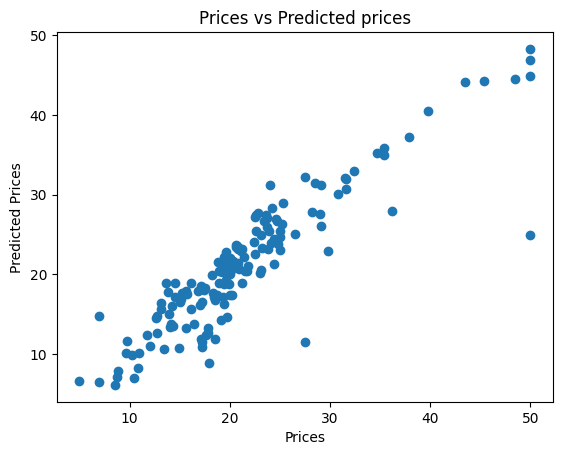

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()